# Kings County Housing Prices Project

This projects goal is to create a linear regression model that can accurately predict housing prices in Kings County, Washington.  

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import HeatMap
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

## Read in Data

In [2]:
# read in data from csv
df = pd.read_csv('./data/kc_house_data_train.csv', index_col=0)

# preview data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Exploratory Data Analysis 
    
Examine the dataframe to become familiar with the data.  Look to see if there are any extreme values.  

In [3]:
# get descriptive statistics of df
round(df.describe(), 2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00
mean,4.565502e+09,540739.55,3.37,2.11,2081.46,15243.40,1.49,0.01,0.24,3.41,7.65,1789.31,292.16,1970.79,83.81,98078.19,47.56,-122.21,1987.99,12873.48
std,2.874656e+09,373318.98,0.94,0.77,920.02,42304.62,0.54,0.09,0.78,0.65,1.17,829.27,443.15,29.34,400.33,53.61,0.14,0.14,684.80,27227.44
min,1.000102e+06,75000.00,0.00,0.00,290.00,572.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,2.114701e+09,321000.00,3.00,1.50,1430.00,5081.25,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5111.25
50%,3.903650e+09,450000.00,3.00,2.25,1920.00,7642.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1974.00,0.00,98065.00,47.57,-122.23,1840.00,7622.50
75%,7.301150e+09,645000.00,4.00,2.50,2550.00,10725.75,2.00,0.00,0.00,4.00,8.00,2214.50,560.00,1996.00,0.00,98118.00,47.68,-122.13,2360.00,10101.75
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,858132.00


Drop ID column, just name not needed

In [4]:
# drop id column
df.drop(['id'], axis=1, inplace=True)

Convert date column to datetime

In [5]:
# Convert date sold column to datetime in case we want to work with later 
df['date']=pd.to_datetime(df['date'])

**Continuous Variables:**
- price
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- sqft_living15
- sqft_lot15

**Categorical Variables:**

_Intriniscially continous, but limited range so makes sense to categorize_
- bedrooms
- bathrooms
- floors

_Strictly categorical_
- waterfront
- view
- condition
- grade
- zipcode

**Nominal**
- lat/lon

## Create data visualizations to determine relationships between features and target variables.  

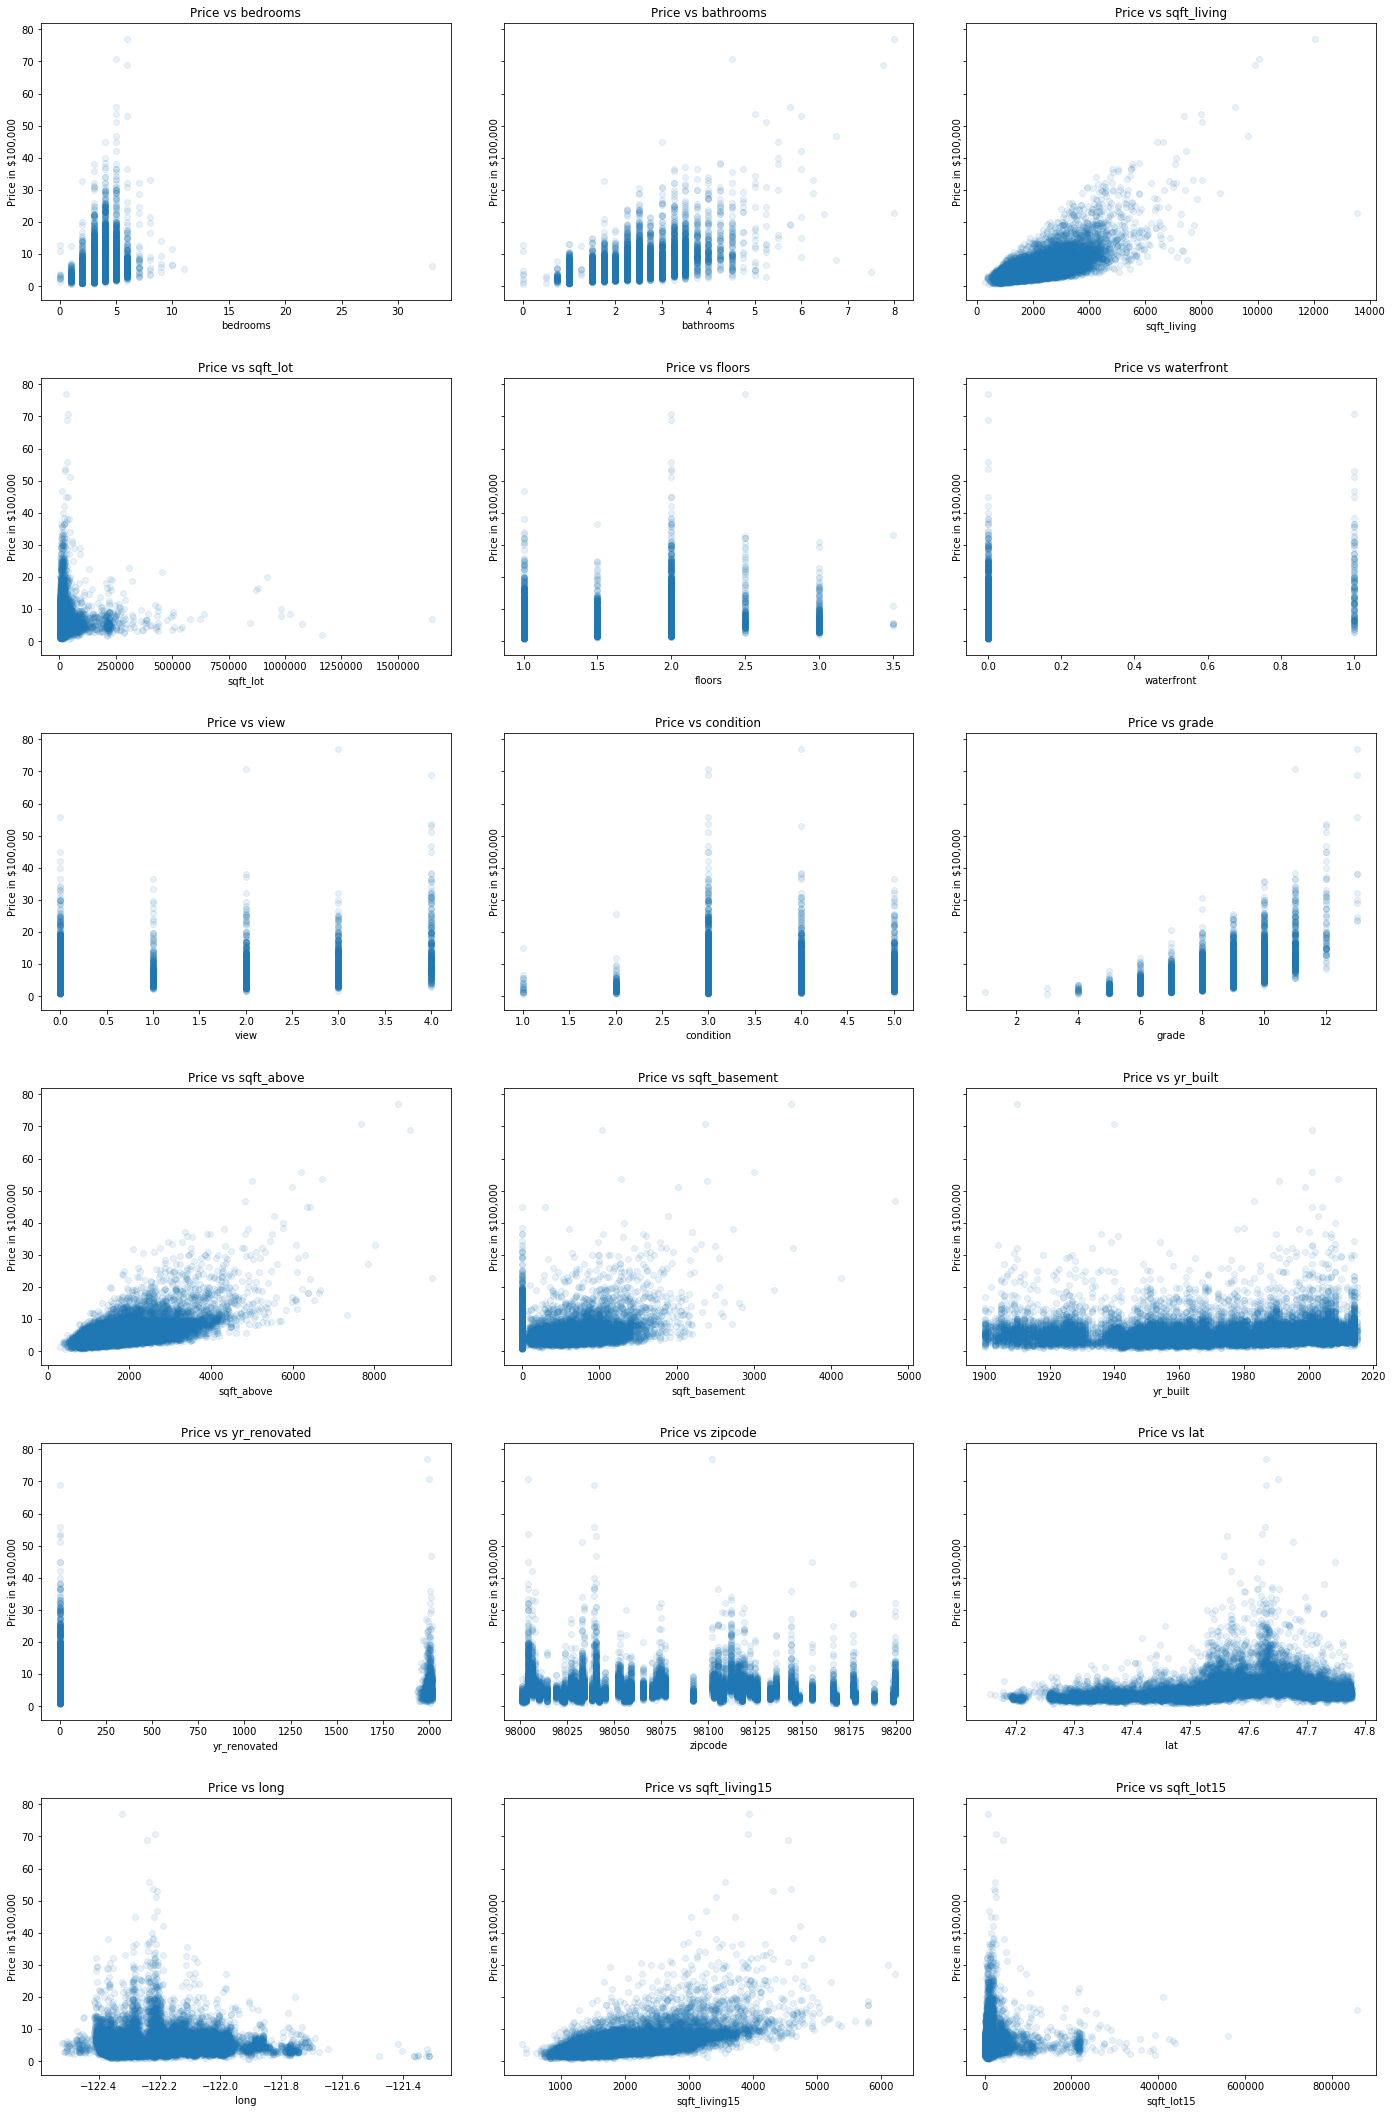

In [6]:
# Check linearity assumption for all features with target variable using scatter plots
fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df.columns[2:]):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
fig.tight_layout(pad=3.0)

plt.savefig('./images/scatterplot_eda.png')

**Preliminary scatterplot observations from:**
- any data with `price` vs. sqft (with the exception of lot which is minimal) has a clear linear relationship 
- amount of `bathrooms`, `bedrooms` (although discrete) have a linear relationship with `price`
- houses with at least 2 floors seem to sell better
- certain `zip_codes` have higher mean prices then others
- `yr_built` does NOT seem to have that much effect on `price`, although houses built during the 1930's (great depression) seem to have lower prices, or there were just not that many that were built
- `yr_renovated` does not seem to have an effect on `price`
- as long as house is in good (3.0) `condition` it seems to sell well
- `grade` has a linear relationship with `price`, also its discrete continous data


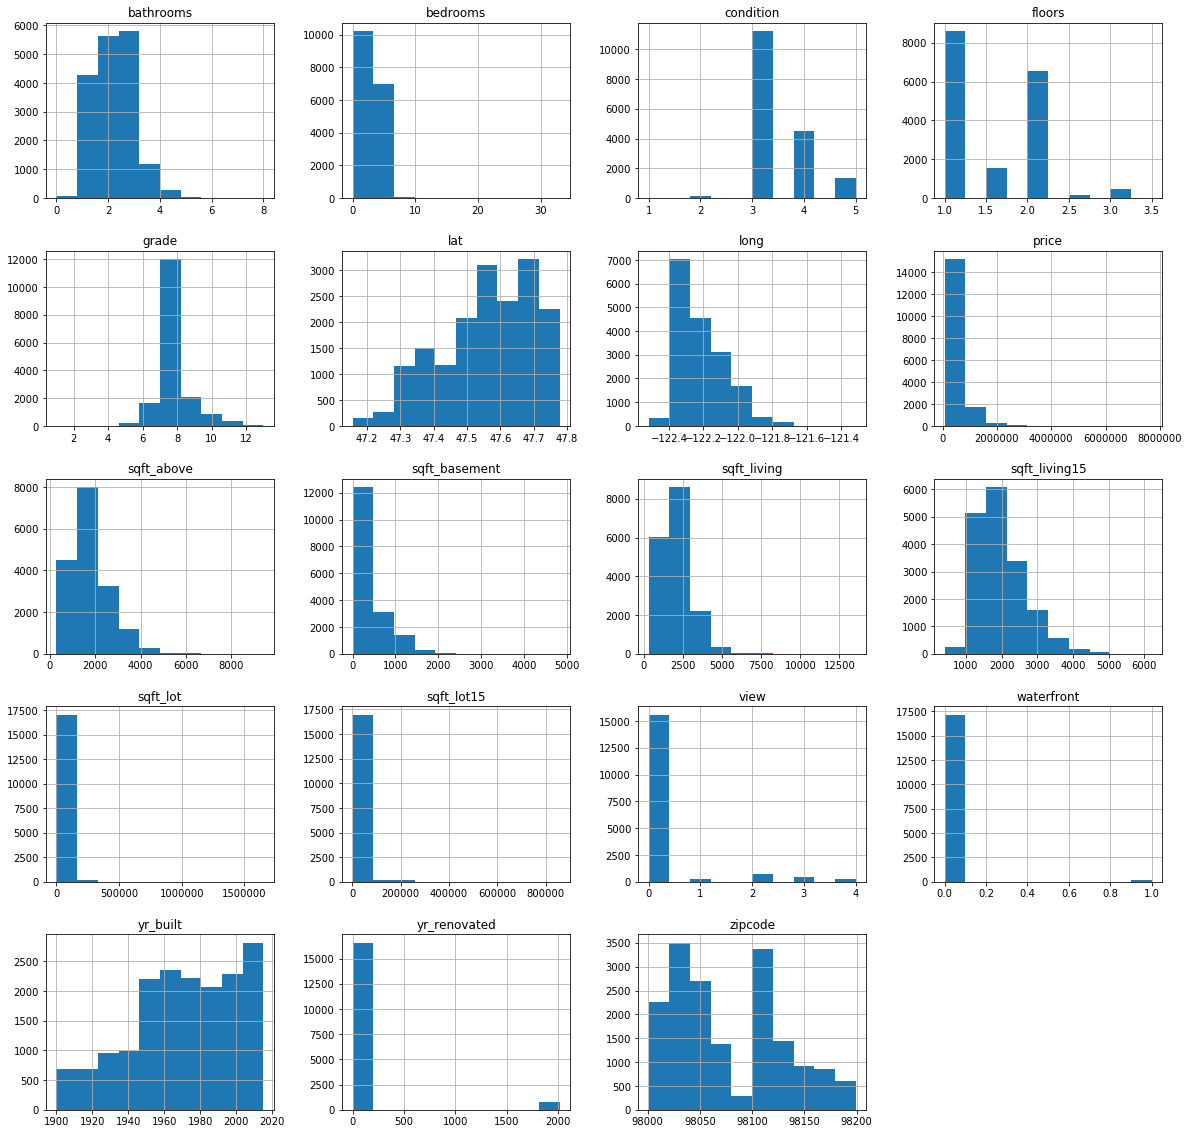

In [7]:
# look at histograms distributions
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df.hist(ax = ax);
plt.savefig('./images/histo_eda.png')

**Preliminary observations from looking at histograms**
- `bathrooms` generally btwn 1.5 - 4
- `bedrooms` under 5?
- most houses have `condition` around 3
- most houses have 1 `floor`
- most `grades` are around 7
- `price` has a positive skewness, should prob log transform to facilitate modeling
- must be some extreme outliers in all sqft because most distributions are positively skewed and can't even see larger propoerties binning
- most have a `view` of 0 and `waterfront` of 0
- `yr_built` starting in 1950's building of houses really started to take off
- proliferation of 0 on `yr_renovated` leads me to believe that most have NOT been renovated
- certain `zipcode` have significantly more houses then others

In [8]:
# check out dtypes, look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 20 columns):
date             17290 non-null datetime64[ns]
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 2.8 MB


**Observations:**
- No NULL values
- (1) object (date)
- Rest are float (5) and int (15)

In [9]:
# look at value_counts to identfy any outliers
for col in df.columns:
    print('\n')
    print(col, df[col].value_counts())
    



date 2014-06-25    111
2014-06-23    111
2014-06-26    106
2014-07-08    101
2015-04-22     99
             ... 
2014-11-02      1
2014-05-17      1
2015-05-10      1
2014-12-21      1
2015-05-24      1
Name: date, Length: 371, dtype: int64


price 350000.0     138
450000.0     136
550000.0     135
400000.0     123
500000.0     119
            ... 
418900.0       1
1544500.0      1
863500.0       1
234975.0       1
311300.0       1
Name: price, Length: 3534, dtype: int64


bedrooms 3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64


bathrooms 2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.

**Value count observations on outliers:**

`bedrooms` - bizarre 33 bedroom house, twelve 0 bedroom houses

`bathrooms` - eight 0 bathroom houses, also some outliers 6 and above?

`grade` - one 1 grade, 2 grade  3

Deal with bedrooms

In [10]:
# view descriptive stats of bedrooms column
df['bedrooms'].describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [11]:
# get the mean of bedrooms without 0 and 33 
mean_bed_no_outliers = df.loc[(df['bedrooms'] != 33) | (df['bedrooms'] != 0), 'bedrooms'].mean()

In [12]:
# replace 33 and 0 with mean_bed_no_outliers
df['bedrooms'] = np.where((df['bedrooms'] == 33) | (df['bedrooms'] == 0), round(mean_bed_no_outliers), df['bedrooms'])

Deal with bathrooms

In [13]:
# get descriptive statistics of bathrooms column
df['bathrooms'].describe()

count    17290.000000
mean         2.111943
std          0.770476
min          0.000000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [14]:
# seems like places with 6 or more bathrooms coulld be considered outliers
print(sum(df['bathrooms'] >= 6.0))
# anything >= 6 is above 99.94% quantile
print(df['bathrooms'].quantile(.9994))

15
6.0


In [15]:
# get the mean of bathrooms without 0 and >= 6
mean_bath_no_outliers = df.loc[(df['bathrooms'] != 0) | (df['bathrooms'] < 6.0), 'bathrooms'].mean()

In [16]:
# replace 0 and >= 6.0 with mean_bath_no_outliers
df['bathrooms'] = np.where((df['bathrooms'] == 0) | (df['bathrooms'] >= 6.0), round(mean_bath_no_outliers), df['bathrooms'])

### Check for multicolinearity

In [17]:
# generate copy of df without target variable (price), date and lat/lon to perform multicolinearity check
df_pred = df.drop(['date', 'price', 'lat', 'long'], axis=1)
df_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,2390,7700
1,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,2370,6283
2,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,3710,9685
3,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,4050,14226
4,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,2250,4050


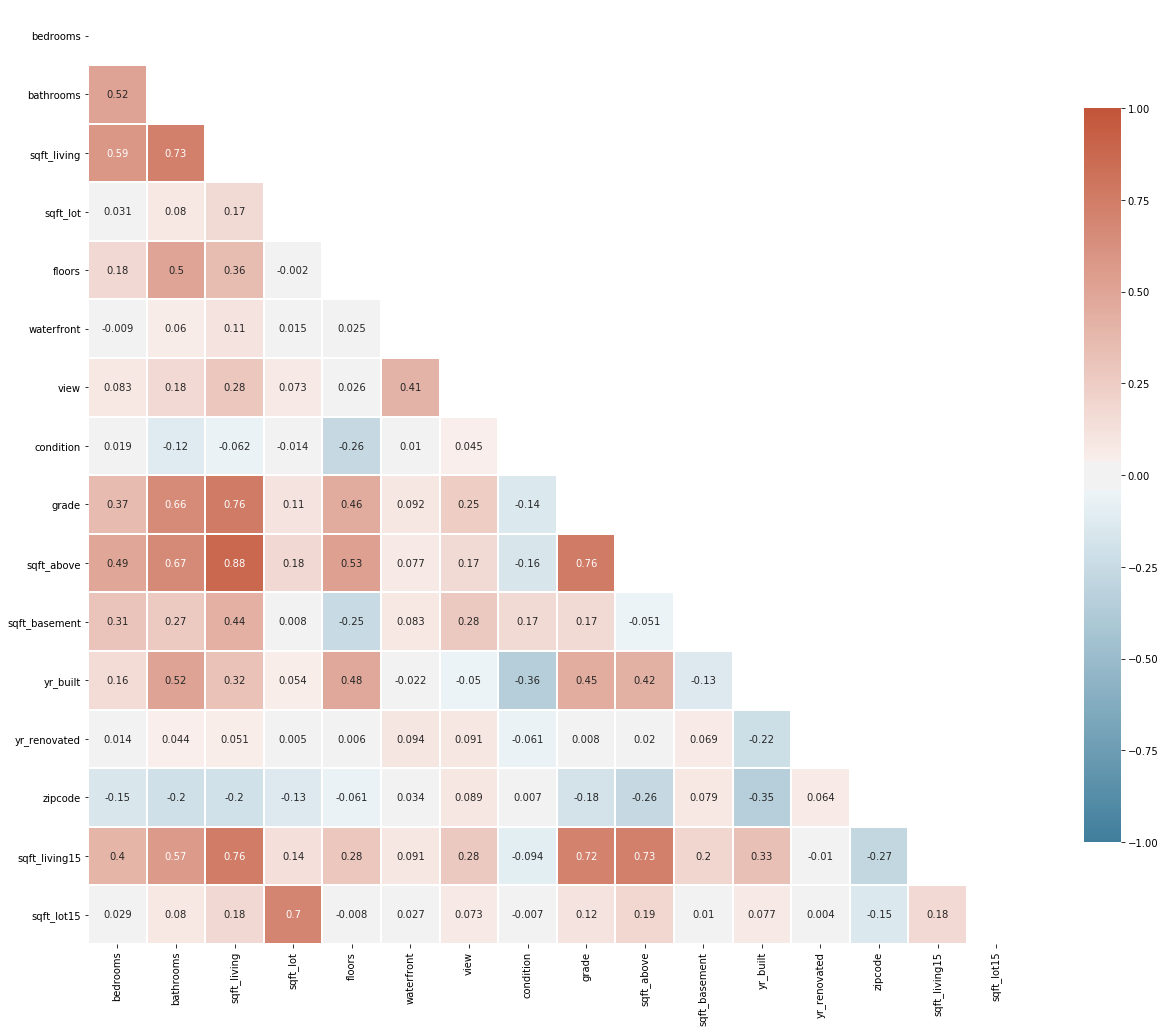

In [18]:
# check for multicolinearity with seaborn heatmap
# compute the correlation matrix
corr = round(df_pred.corr(), 3)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(21, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)

plt.savefig('./images/multicolin_heatmap.png')
plt.show();

Using .75 as a cutoff, there is high correlation between `sqft_living`, `sqft_living15` and `sqft_above` as a result will probably only retain one of these. 

_Note:_ `grade` is on this high correlation list as well if kept as numerical, will probably be handled as a categorical

### Verify visual check for multicollinearity 

In [19]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)


In [20]:
# show correlation >.75 and below 1
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]


,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(sqft_living, grade)",0.762929
"(grade, sqft_above)",0.758247
"(sqft_living, sqft_living15)",0.755066


After these multicollinearity checks, I have decided to work with `sqft_living` in lieu of `sqft_above` & `sqft_living15`. Additionally, I will work with `grade` as a categorical and create dummy columns.

## Preparing Categorical Data
Exaxmine categorical data more closely with boxplots. 

In [21]:
# convert to category type
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')   

Plotting categoricals with boxplots

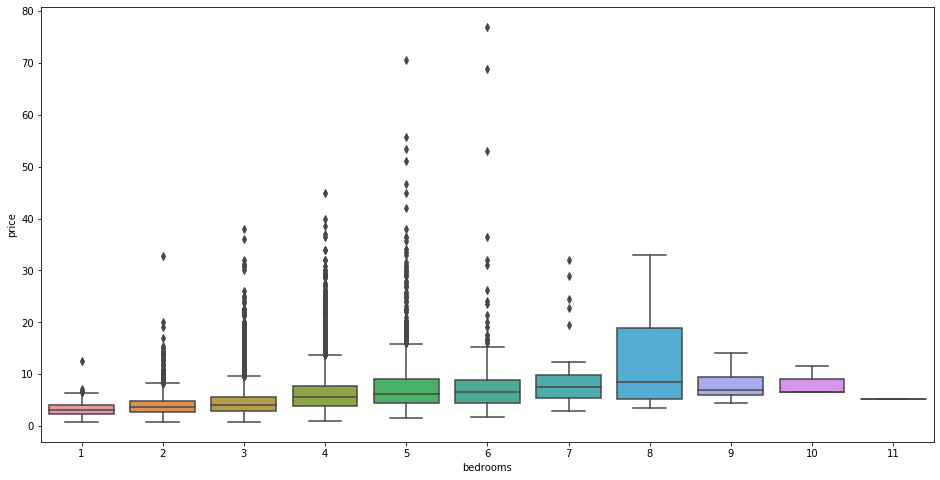

In [22]:
# bedrooms
var = 'bedrooms'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='price', data=data)


Number of bedrooms seem to have a direct correlation to price, once it hits 6, it seems to taper off. 

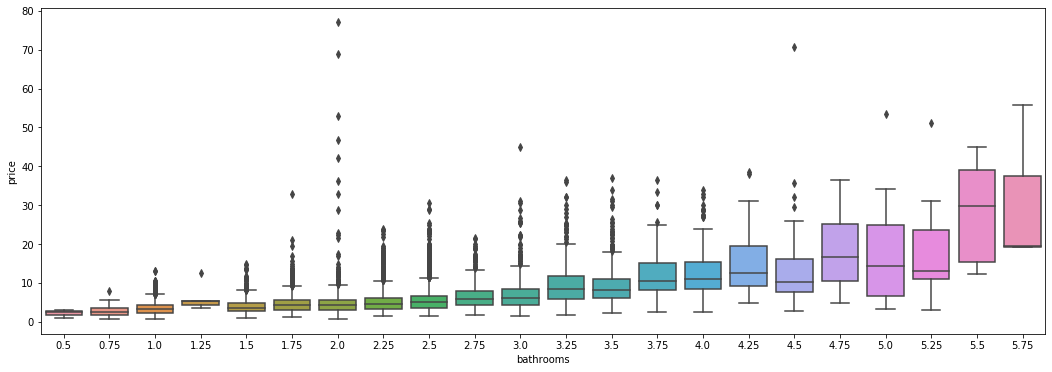

In [23]:
# bathrooms
var = 'bathrooms'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var, y='price', data=data)


Number of bathrooms seem to have a direct correlation to price as well, steadily climbs as number goes up. 

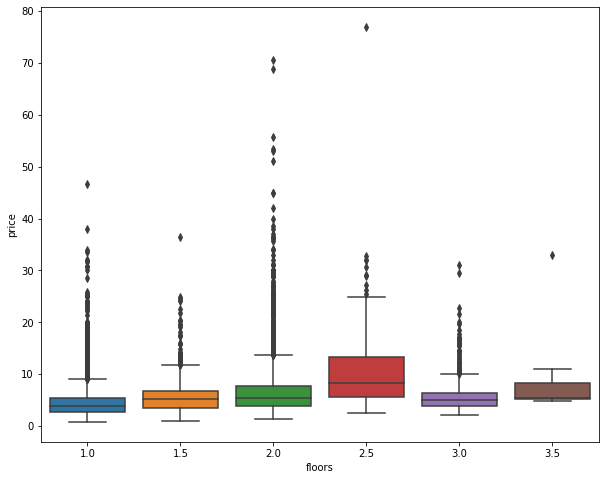

In [24]:
# floors
var = 'floors'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)


Once 2.5 `floors`(1st, 2nd and basement/attic) price seems to stabilize. 

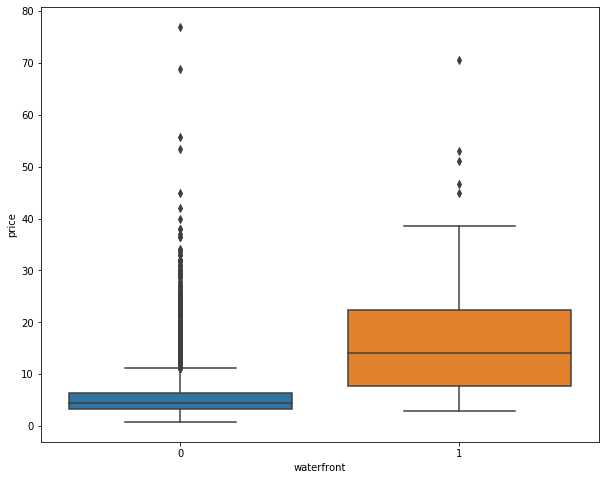

In [25]:
# waterfront
var = 'waterfront'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

Obvious waterfront significantly higher mean price, not sure if it would be much of a predictor though since low
quantity of houses actually on waterfront, unless this was a more specific study. Probably won't use this predictor.

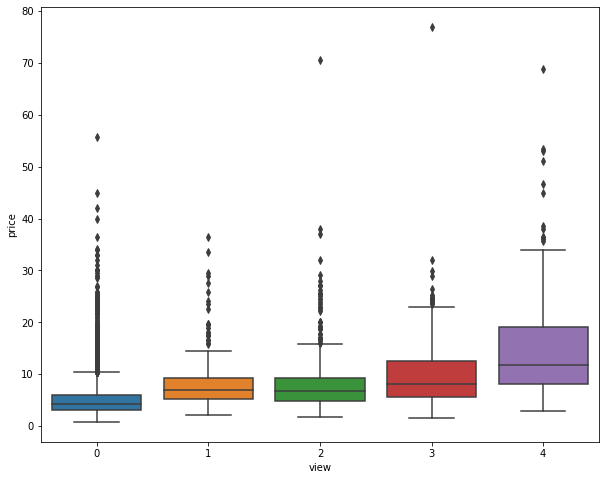

In [26]:
# view
var = 'view'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)


Better `view` indicates higher price, however there are still some higher priced homes with 0 `view`. Perhaps this warrants a statistical test for significance.


In [27]:
# difference in mean between view and no view
mean_no_view = df.loc[(df['view'] == 0), 'price'].mean()
mean_view = df.loc[(df['view'] != 0), 'price'].mean()
mean_view - mean_no_view

442249.10581883386

### Statistical test #1 for view or no view

**1) Set up null and alternative hypotheses**

*Null Hypothesis:*
That there is no difference between houses with a view or without a view

*Alternative Hypothesis*
That there is a difference between houses with a view or without a view

**2) Choose significance level**

95% or alpha of .05

**3) Calculate the test statistic**

In [28]:
n_view = len(df.loc[(df['view'] != 0)])
n_no_view = len(df.loc[(df['view'] == 0)])

crit = stats.t.ppf(1-0.025, (n_view+n_no_view-2))
crit

1.9601012146709136

**4) Determine the critical or p-value (find the rejection region)**

In [29]:
no_view_price = df.loc[(df['view'] == 0), 'price']
view_price = df.loc[(df['view'] != 0), 'price']

In [30]:
stats.ttest_ind(no_view_price, view_price)

Ttest_indResult(statistic=-49.84632672319032, pvalue=0.0)

**5) Compare t-value with critical t-value to reject or fail to reject the null hypothesis**

I would reject the Null hypothesis that there is no difference between price of houses with a view and without. Therefore, I will include this in our model. 

### Feature Engineering #1

In [31]:
# create bool column for view which will be used as a predictor
df['yes_view'] = np.where(df['view'] != 0, 1, 0)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yes_view
0,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0
1,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0
2,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1
3,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1
4,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0


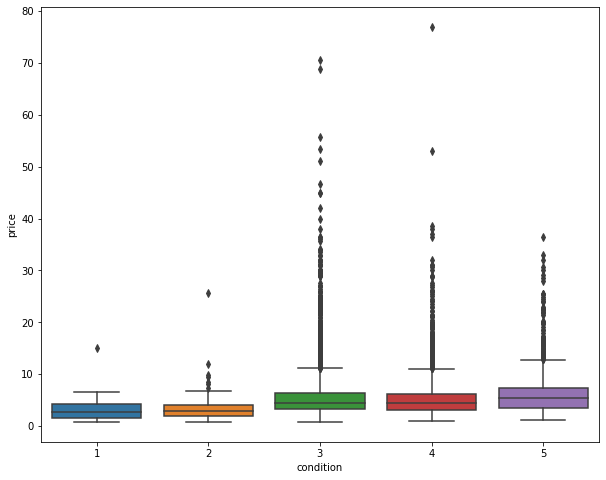

In [33]:
# condition
var = 'condition'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)


Once `condition` hits 3, it seems like prices go up.

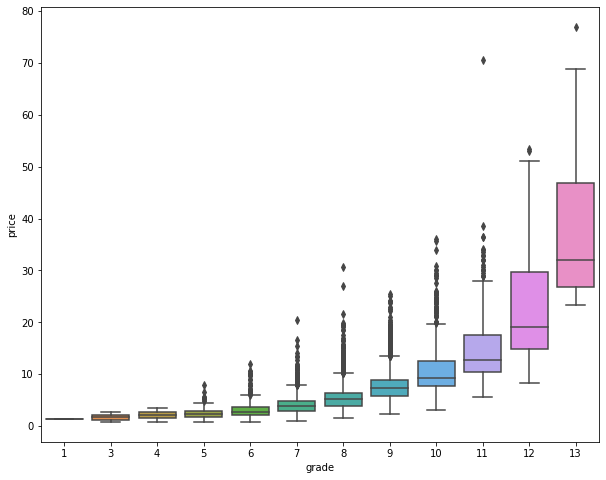

In [34]:
# grade
var = 'grade'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)


`grade` has a strong relationship to price, will most likely use this as a predictor. 

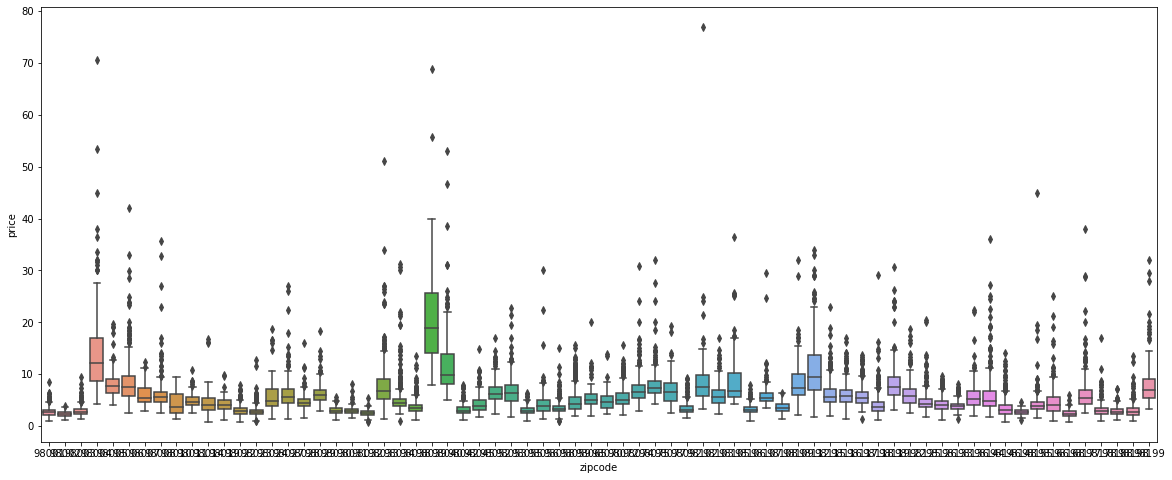

In [35]:
var = 'zipcode'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(20,8))
fig = sns.boxplot(x=var, y='price', data=data)


`zipcode` seem to be a strong predictor of `price`, however I am concered with creating dummy variables for this in fear of overfitting the model....if these were someway to create bins that had like zipcodes together i.e. demographically, school zones etc maybe that would be a better approach. For now I will run an ANOVA statististical test to look at measures of variance between zip code.

## Statistical test #2 ANOVA with zipcodes

In [36]:
formula = 'price ~ C(zipcode)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq       df           F  PR(>F)
C(zipcode)  9.673067e+14     69.0  167.386197     0.0
Residual    1.442210e+15  17220.0         NaN     NaN


A p-value of 0.0 indicates there is a significant difference between zipcode. I will simply take a look at zipcodes on a map to see if there are any geographical outliers that can be identified

In [37]:
seattle = [47.5100, -121.9000] # set lat lon of seattle
default_zoom = 9.4 # set zoom start

# create map object
base_map = folium.Map(location=seattle, zoom_start=default_zoom, control_scale=True, tiles='Stamen Toner')

# create HeatMap from lat lon data
HeatMap(data=df[['lat', 'long']].values.tolist(), radius=15).add_to(base_map)

# save as html file
base_map.save('./images/latlonheatmap.html')

#show map
base_map


There are clearly visual outliers to the east, I will add markers on map to get longitude to eliminate from df. These would not be good predictors of housing prices in the Seattle metro area. 

In [38]:
# create ClickForMarker map to obtain longitude
base_map.add_child(folium.ClickForMarker())


As you can see (have to click to add markers) from visual representation on mayp, anything east (or greater than) of -121.6763 could be considered an outlier. Next I will look at how the target variable varies from the descriptive statistics by isolating via longitude.

In [39]:
# sum up total observations with > -121.6763 longitude
sum(df['long'] > -121.6763)

16

In [40]:
# difference in mean between rural east and rest of df
mean_price_not_rural_east = df.loc[df['long'] < -121.6763, 'price'].mean()
mean_price_long_rural_east = df.loc[df['long'] > -121.6763, 'price'].mean()
mean_price_not_rural_east - mean_price_long_rural_east

307461.5706263749

In [41]:
# get the lat/lon of houses that are rural east outliers to add markers on map for reproducability and create df
df_rural_east = df.loc[df['long'] > -121.6763]
df_rural_east

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yes_view
14,2015-03-23,160000.0,3,1.00,1140,3240,1.5,0,0,4,...,1140,0,1910,0,98014,47.7093,-121.364,1140,4700,0
841,2015-04-17,375000.0,3,1.75,2140,13598,1.5,0,0,4,...,1620,520,1970,0,98014,47.7139,-121.321,930,10150,0
961,2014-11-12,155000.0,3,1.00,1300,6098,1.0,0,0,3,...,1300,0,2013,0,98014,47.7074,-121.364,1300,6849,0
2329,2014-07-09,150000.0,3,0.75,490,38500,1.5,0,0,4,...,490,0,1959,0,98014,47.7112,-121.315,800,18297,0
2596,2014-06-24,380000.0,3,2.25,1860,15559,2.0,0,0,4,...,1860,0,1963,0,98022,47.1559,-121.646,1110,11586,0
4803,2014-10-22,241000.0,2,1.75,1070,9750,1.5,0,0,3,...,1070,0,1995,0,98014,47.7131,-121.319,970,9750,0
5059,2014-09-13,295000.0,2,1.75,1560,43748,2.0,0,0,3,...,1560,0,1967,2000,98065,47.5729,-121.676,1000,24602,0
5148,2015-01-13,160000.0,3,1.00,1340,18552,1.5,0,0,4,...,1340,0,1935,0,98014,47.7129,-121.325,960,15141,0
5270,2014-05-08,134000.0,2,1.50,980,5000,2.0,0,0,3,...,980,0,1922,2003,98014,47.7076,-121.359,1040,5000,0
5581,2014-05-21,525000.0,3,2.75,2100,10362,2.0,0,0,3,...,1510,590,1998,0,98045,47.4347,-121.417,2240,11842,0


In [42]:
# loop to add markers from rural east df to map
for i in range(0,len(df_rural_east)):
    folium.Marker([df_rural_east.iloc[i]['lat'], df_rural_east.iloc[i]['long']]).add_to(base_map)
    
base_map.save('./images/rural_east_markers_on_map.html')

In [43]:
base_map

### Feature Engineering #2

There is a significant dip in average price, thereofore this is a good opportunity to engineer a feature that categorizes if a house is in an eastern rural location. If it is will have a 1 and if not 0. 

In [44]:
# create column classifying rural east vs. not rural east
df['rural_east'] = np.where(df['long']>= -121.6763, 1, 0)

In [45]:
# checking to see if worked, value count should be 16
df['rural_east'].value_counts()

0    17274
1       16
Name: rural_east, dtype: int64

### Create Dummy variables for select categorical datasets 

After reviewing the box plots and a few statistical test in the categorical data, dummy columns will be created for the following:
* _bedrooms_
* _bathrooms_
* _grade_

The aforementioned are most prominent out of categoricals, whereas they have a linear relationship with price.

In [46]:
# create dummy variable for aforementioned categorical features
cat_list_2 = ['bedrooms', 'bathrooms', 'grade']
dummies = pd.get_dummies(df[cat_list_2], prefix=cat_list_2, drop_first=True)

df_preprocessed = df.drop(cat_list_2, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head()

,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2014-10-06,365000.0,2070,8893,2.0,0,0,4,2070,0,...,0,0,0,0,1,0,0,0,0,0
1,2014-08-21,865000.0,2900,6730,1.0,0,0,5,1830,1070,...,0,0,0,0,1,0,0,0,0,0
2,2014-08-15,1038000.0,3770,10893,2.0,0,2,3,3770,0,...,0,0,0,0,0,0,0,1,0,0
3,2015-03-31,1490000.0,4560,14608,2.0,0,2,3,4560,0,...,0,0,0,0,0,0,0,0,1,0
4,2014-07-14,711000.0,2550,5376,2.0,0,0,3,2550,0,...,0,0,0,0,0,1,0,0,0,0


## Preparing Continuous data for model

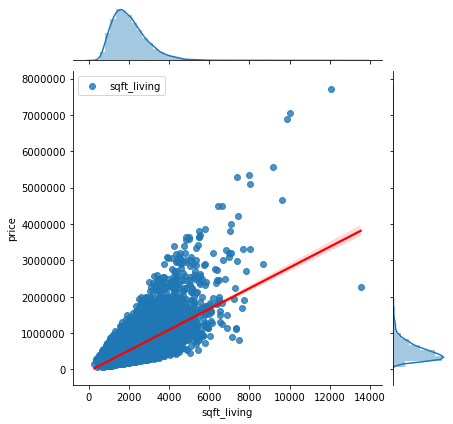

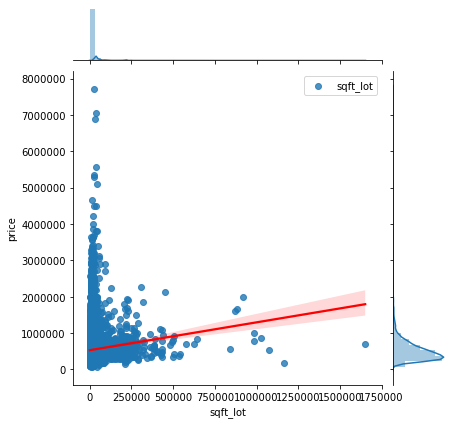

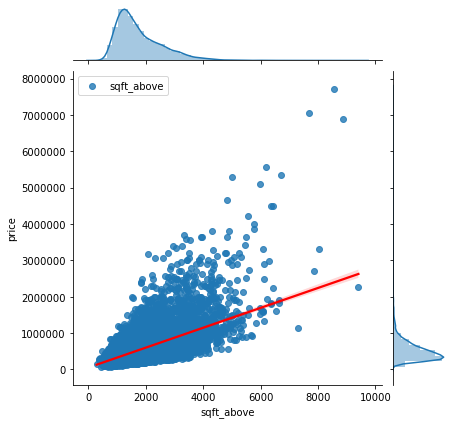

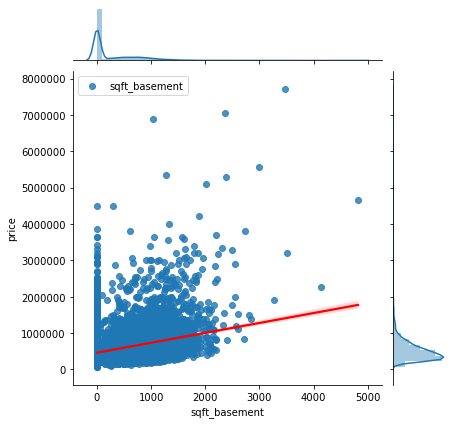

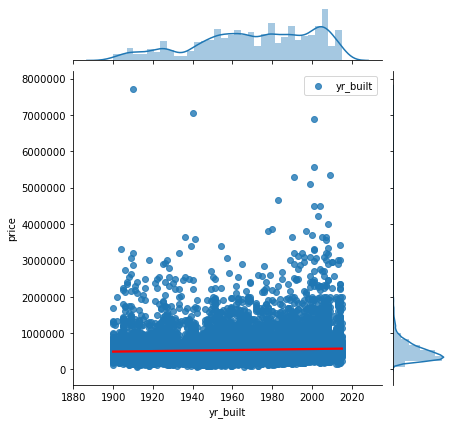

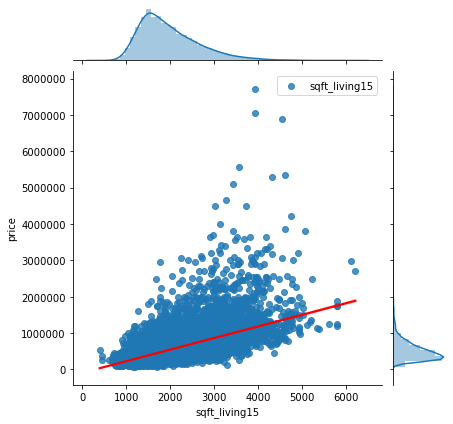

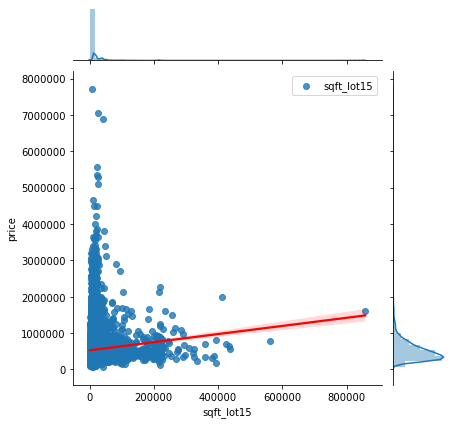

In [47]:
continuous = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15']

for column in continuous:
    sns.jointplot(x=column, y="price", data=df, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

As addressed in the multicolinearity test `sqft_living`, `sqft_living15`, and `sqft_above` predictors all seem to have prominent linear relationships with price, I will use `sqft_living` to avoid this. 

Additionally, there are a bunch of zeros in `sqft_basement` which leads me to believe those homes do not have basements. My third feature will be a boolean basement column. 

### Feature engineering #3

In [48]:
# create basement boolean column
df_preprocessed['basement'] = np.where((df_preprocessed['sqft_basement'] != 0), 1, 0)

### Feature engineering #4

In [49]:
# find median of year house was built
yr_built_med = df_preprocessed['yr_built'].median()
yr_built_med

1974.0

In [50]:
# houses that have never been renovated have 0 as year, and median yr_built is 1974, create a column that combines both of those
# 0 for < 1974 and never been reno, 1 for everyone else
df_preprocessed['yr_built_reno'] = np.where((df_preprocessed['yr_built'] < 1974) & (df_preprocessed['yr_renovated'] == 0), 0,1)

In [51]:
# check to see if processing worked
df_preprocessed['yr_built_reno'].value_counts()

1    9424
0    7866
Name: yr_built_reno, dtype: int64

## Train-Test Split

Split the data to train model

In [52]:
#your code here 

features = ['sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition','yes_view', 'rural_east', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bathrooms_0.75', 'bathrooms_1.0',
       'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0',
       'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0',
       'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0',
       'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0',
       'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'basement',
       'yr_built_reno']

df_features = df_preprocessed[features]

target = df_preprocessed['price']

In [53]:
len(features)

52

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))                                                    

13832 3458 13832 3458


## Fit the model to the training data.

In [57]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 214245.27934797422


The above means that the model is ~214k per house price prediction.

In [87]:
# get the coefficents
lm.coef_

array([ 1.47844125e+02, -2.52162429e-01,  5.61719791e+04,  5.88934337e+05,
        4.18383155e+04,  3.89805911e+04,  9.86639392e+03, -8.33573261e+04,
       -1.40605065e+04, -6.36879211e+04, -8.92832109e+04, -8.97697544e+04,
       -1.11606453e+05, -1.66268504e+05,  1.20753859e+05, -2.05979354e+05,
       -2.60211668e+05, -1.41171238e+05,  5.95026974e+04,  1.11052416e+05,
        8.72571434e+03,  8.64678078e+04,  9.77814658e+04,  1.14086972e+05,
        9.13961513e+04,  5.81937310e+04,  7.60492742e+04,  1.17738771e+05,
        1.43010224e+05,  9.89305703e+04,  2.28379216e+05,  1.91366726e+05,
        2.45743874e+05,  2.06067078e+05,  4.07143570e+05,  3.64941747e+05,
        5.08799847e+05,  4.07131969e+05,  3.15338510e+05, -1.70088221e+05,
       -9.93468766e+04, -1.33553061e+05, -9.69584391e+04, -2.75437482e+04,
        6.54228067e+04,  2.07801229e+05,  3.72142871e+05,  6.06157947e+05,
        1.11807272e+06,  2.50633082e+06,  4.38490185e+04, -1.03277656e+05])

In [91]:
# display coefficents in a more readable manner
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [92]:
coefficients

,0,0
0,sqft_living,1.478441e+02
1,sqft_lot,-2.521624e-01
2,floors,5.617198e+04
3,waterfront,5.889343e+05
4,view,4.183832e+04
5,condition,3.898059e+04
6,yes_view,9.866394e+03
7,rural_east,-8.335733e+04
8,bedrooms_2,-1.406051e+04
9,bedrooms_3,-6.368792e+04


Essentially all of these coefficients explain that if the target variable varies by 1 unit ($), the respective feature is expected to vary by the level specified in the coefficient.

###  Use the model to predict on the training set and the test set.

In [58]:
# use model to predict on test set
test_preds = lm.predict(X_test)

In [59]:
# Evaluate the training and test predictions using RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_preds))
print(test_rmse )

210039.71961850274


Test set performed better then train split, therefore model is not overfit.

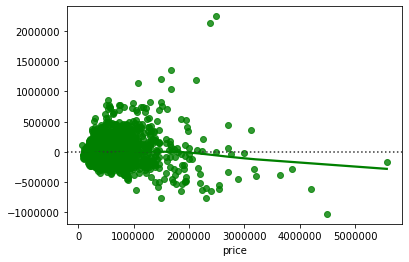

In [90]:
sns.residplot(y_test, test_preds, lowess=True, color='g');

## Try some  different feature selection techniques before fitting model with whole set.

In [74]:
# import necessary package
from sklearn.feature_selection import RFECV

In [75]:
# instantiate object
ols = linear_model.LinearRegression()

In [76]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [77]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [78]:
len(list(selected_rfe))

52

In [79]:
len(list(removed_rfe))

0

RFECV test did not reccomend removing any features, will try KBest F test with n = 30 to see if it makes any difference.

## Try KBest test

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x1a29750048>)

In [68]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [80]:
# check removed columns
removed_columns

Index(['sqft_lot', 'condition', 'rural_east', 'bedrooms_7', 'bedrooms_8',
       'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bathrooms_0.75',
       'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0',
       'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0',
       'bathrooms_5.75', 'grade_3', 'grade_4', 'grade_5', 'grade_8'],
      dtype='object')

In [81]:
# check selected columns
selected_columns

Index(['sqft_living', 'floors', 'waterfront', 'view', 'yes_view', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1.0',
       'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0',
       'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0',
       'bathrooms_5.25', 'bathrooms_5.5', 'grade_6', 'grade_7', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'basement',
       'yr_built_reno'],
      dtype='object')

### After removing the features, re-run to see if your new model performs better than the old model.

In [71]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

# predict selected columns from kbest
y_train_kbest = lm_kbest.predict(X_train[selected_columns])

# get rmse
trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 217570.43309711193
Testing Root Mean Squared Error: 212162.2336930283


So the KBest test with **k=30** actually performed worse (212k RMSE vs 210k RMSE) then the first model, therefore I will include all 52 features in my final model. 

## Refit model to the entire dataset.

In [72]:
# select model features used for entire dataset 
df_features_full_set = df_preprocessed[features]

#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df_features_full_set, target)

## Save final model using pickle.

In [73]:
import pickle

pickle_out = open('model.pickle', 'wb')
pickle.dump(lm_final, pickle_out)
pickle_out.close()